# Practica 2 Tipologia y ciclo de vida de los datos 
## Dmytro Pravdyvets y Mariona Alberola 

## 1. Descripción del dataset
### ¿Por qué es importante y qué pregunta/problema pretende responder?

En esta practica vamos a continuar con el dataset generado en la practica anterior. Como hemos expliado previamente, la idea de estas dos practicas es automatizar la busqueda y seleccion de articulos cientificos de interes. 

Automatizacion de busqueda de infromacion relevante para un investigador es un proceso que puede beneficiar muchisimo a un cientifico ya que le permitira estar mas tiempo haciendo su trabajo que una maquina no puede hacer. 

En esta practica vamos a mirar cual es el porcentaje de papers que han aplicado ML y AI en el ambito de inmunologia, que algoritmos se han usado y si hay una tendencia de aumento de papers mas computacionales en los ultimos años. 

## 2. Integración y selección de los datos de interés a analizar

En la anterior practica solo hemos trabajado con los articulos publicados en el año 2022, no obstante hemos pensado que seria mas interesante aumentar este numero y trabajar con papers en los ultimos 5 años (2017-2022) con un total de 549 articulos.

Recordemos las columnas de nuestro dataset:

*Article*: Nombre del artículo científico.

*Summary*: Resumen general de la investigación que se ha llevado a cabo.

*Authors*: Nombre de los autores del artículo científico.

*Date*: Fecha de publicación.

*Access*: Si es de acceso público o se tiene que pagar para acceder al artículo.

*Figure*: Una imagen representativa del estudio en cuestión.

*Link paper*: Link del artículo científico, los artículos de acceso no público muestran el
título del artículo y el resumen general del artículo.

*TCR, BCR, T CELL, B CELL, NKC, CD4, CD8, DEEP LEARNING, MACHINE
LEARNING ML DL CNN LSTM y HLA*: palabras clave que nos interesan, en caso de que el estudio
contenga esa palabra clave el valor va a ser 1 y en caso de no contenerla será 0.


De estas columnas, los keywords es la parte mas interesante ya que nos permitira filltrar el data por los diferentes tipos de celulas (T y B cells) y ver cuantos papers ML y AI para hacer el analysis. 

Una vez tengamos lo papers de interes podemos aplicar NLP para ver la similaritud de los articulos. La idea que tenemos es a traves del abstract crear un heatmap con las distnacias entre los papers de las subcategorias como T-cell ML, B-cell ML por ejemplo para que nos sea mas facil ver papers parecidos a los papers que hemos detectado como papers de interes manualmente. Por ejemplo, hemos sacado todos los papers de interes y hemos leido el primero que va de clasificacion de celulas T CD4+ utilizando ML, con el heatmap podemos ver que otros papers son parecidos a este para no tener que leernos todos los papers de interes, sino solo los mas parecidos al nuestro paper de interes actual 

In [18]:
import pandas as pd

In [19]:
data=pd.read_csv("../dataset/2022_immuno_articles.csv")
data.head()

Article  \
0  Oxeiptosis, a ROS-induced caspase-independent ...   
1  Diversification of human plasmacytoid predendr...   
2  Viral unmasking of cellular 5S rRNA pseudogene...   
3  Engagement of MHC class I by the inhibitory re...   
4  Nuclear RNF2 inhibits interferon function by p...   

                                             Summary  \
0  Reactive oxygen species (ROS) are generated by...   
1  Plasmacytoid dendritic cells (pDCs) are known ...   
2  RIG-I is a cytosolic RNA sensor. Gack and coll...   
3  Host cells display ‘don’t eat me’ signals to p...   
4  Cao and colleagues identify the E3 ubiquitin l...   

                                             Authors         Date  \
0     Cathleen HolzeChloé MichaudelAndreas Pichlmair  18 Dec 2017   
1  Solana G. AlculumbreViolaine Saint-AndréVassil...  04 Dec 2017   
2  Jessica J. ChiangKonstantin M. J. SparrerMicha...  27 Nov 2017   
3           Amira A. BarkalKipp WeiskopfRoy L. Maute  27 Nov 2017   
4                   Shuo LiuMinghong JiangXuetao Cao  21 Nov 2017   

         Access                                             Figure  \
0  Payed Access  https://media.springernature.com/w290h158/spri...   
1  Payed Access  https://media.springernature.com/w290h158/spri...   
2  Payed Access  https://media.springernature.com/w290h158/spri...   
3  Payed Access  https://media.springernature.com/w290h158/spri...   
4  Payed Access  https://media.springernature.com/w290h158/spri...   

                                          Link paper  TCR  BCR  T CELL  ...  \
0  https://www.nature.com/articles/s41590-017-0013-y    0    0       0  ...   
1  https://www.nature.com/articles/s41590-017-0012-z    0    0       0  ...   
2  https://www.nature.com/articles/s41590-017-0005-y    0    0       0  ...   
3  https://www.nature.com/articles/s41590-017-0004-z    0    0       0  ...   
4  https://www.nature.com/articles/s41590-017-0003-0    0    0       0  ...   

   NKC  CD4  CD8  DEEP LEARNING  MACHINE LEARNING  ML  DL  CNN  LSTM  HLA  
0    0    0    0              0                 0   0   0    0     0    0  
1    0    0    1              0                 0   0   0    0     0    0  
2    0    0    0              0                 0   0   0    0     0    0  
3    0    1    0              0                 0   0   0    0     0    0  
4    0    0    0              0                 0   0   0    0     0    0  

[5 rows x 21 columns]

## 3. Limpieza de los datos

El primer paso en la limpieza de datos seria verificar que no hay missing data en nuestro dataset. A la hora de diseñar el codigo de web scraping, hemos intentado hacerlo de tal manera que el data sacado de la pagina web sea lo mas completo posible. 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Article           549 non-null    object
 1   Summary           549 non-null    object
 2   Authors           549 non-null    object
 3   Date              520 non-null    object
 4   Access            549 non-null    object
 5   Figure            549 non-null    object
 6   Link paper        549 non-null    object
 7   TCR               549 non-null    int64 
 8   BCR               549 non-null    int64 
 9   T CELL            549 non-null    int64 
 10  B CELL            549 non-null    int64 
 11  NKC               549 non-null    int64 
 12  CD4               549 non-null    int64 
 13  CD8               549 non-null    int64 
 14  DEEP LEARNING     549 non-null    int64 
 15  MACHINE LEARNING  549 non-null    int64 
 16  ML                549 non-null    int64 
 17  DL              

Podemos ver que no hay missing data ya que todas las columnas tienen el maximo de non-null values. No obstante vemos que las columnas de keywords se identifican como integers, vamos a cambiarlas a string.

In [22]:
keywords=["TCR","BCR","T CELL","B CELL","NKC","CD4","CD8","DEEP LEARNING","MACHINE LEARNING","ML","DL","CNN","LSTM","HLA"]
for key in keywords:
    data[key]=data[key].astype(str)
data['Date'] = pd.to_datetime(data['Date'])


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Article           549 non-null    object        
 1   Summary           549 non-null    object        
 2   Authors           549 non-null    object        
 3   Date              520 non-null    datetime64[ns]
 4   Access            549 non-null    object        
 5   Figure            549 non-null    object        
 6   Link paper        549 non-null    object        
 7   TCR               549 non-null    object        
 8   BCR               549 non-null    object        
 9   T CELL            549 non-null    object        
 10  B CELL            549 non-null    object        
 11  NKC               549 non-null    object        
 12  CD4               549 non-null    object        
 13  CD8               549 non-null    object        
 14  DEEP LEARNING     549 non-

Ahora vemos que todas las variables que tenemos no son numericas y la columna Date es de tipo date. Vemos que si a la hora de diseñar el codigo de web scraping se hace un esfuerzo para obtener el data de mayor calidad posible, la limpieza de data sera facil. 

Dado que no es dataset de data numerico, no tenemos que revisar outliers ni ningun tipo de valores raros

## 4. Análisis de los datos

Como ya hemos dicho previamente, el analisis principal consistira de analisis de similaritud de articulos en funcion del abstract de los articulos. Para ello vamos a necesitar a definir como vamos a calcular la similaritud o la distancia entre los articlos. 

La primera parte de este problema es la representación. ¿Cómo representamos el texto? Podríamos dejar el texto tal como está o convertirlo en vectores de características utilizando una técnica de incrustación de texto adecuada. Una vez que tenemos la representación del texto, podemos calcular la puntuación de similitud usando una de las muchas medidas de distancia/similitud.

## Metricas de distancia 

### Índice Jaccard

El índice de Jaccard, también conocido como coeficiente de similitud de Jaccard, trata los objetos de datos como conjuntos. Se define como el tamaño de la intersección de dos conjuntos dividido por el tamaño de la unión.

Para calcular la similitud utilizando la similitud de Jaccard, primero realizaremos la normalización del texto para reducir las raíces/lemas de las palabras.


### Distancia euclidiana

La distancia euclidiana, o norma L2, es la forma más utilizada de la distancia de Minkowski. En términos generales, cuando la gente habla de distancia, se refiere a la distancia euclidiana. Utiliza el teorema de Pitágoras para calcular la distancia entre dos puntos.

Cuanto mayor sea la distancia d entre dos vectores, menor será la puntuación de similitud y viceversa.

Las distancias pueden variar de 0 a infinito, necesitamos usar alguna forma de normalizarlas al rango de 0 a 1.

Aunque tenemos nuestra fórmula de normalización típica que usa la media y la desviación estándar, es sensible a los valores atípicos. Eso significa que si hay algunas distancias extremadamente grandes, cualquier otra distancia se hará más pequeña como consecuencia de la operación de normalización. Usando la formula: 1/$\exp$(distance).

### Cosine Similarity 

Cosine Similarity calcula la similitud de dos vectores como el coseno del ángulo entre dos vectores. Determina si dos vectores apuntan aproximadamente en la misma dirección. Entonces, si el ángulo entre los vectores es 0 grados, entonces la similitud del coseno es 1.

### ¿Qué métrica usar?

La similitud de Jaccard tiene en cuenta solo el conjunto de palabras únicas para cada documento de texto. Esto lo convierte en el candidato probable para evaluar la similitud de los documentos cuando la repetición no es un problema. Un excelente ejemplo de una aplicación de este tipo es comparar descripciones de productos. Por ejemplo, si un término como "HD" o "eficiencia térmica" se usa varias veces en una descripción y solo una vez en otra, la distancia euclidiana y la similitud del coseno disminuirían. Por otro lado, si el número total de palabras únicas permanece igual, la similitud de Jaccard permanecerá sin cambios.

Dicho esto, la similitud de Jaccard no se suele cuando se trabaja con datos de texto, ya que no funciona con embeddings de texto. Esto significa que se limita a evaluar la similitud léxica del texto, es decir, qué tan similares son los documentos a nivel de palabras.

En lo que respecta a las métricas de coseno y euclidianas, el factor diferenciador entre las dos es que la similitud del coseno no se ve afectada por la magnitud/longitud de los vectores de características. Digamos que estamos creando un algoritmo de etiquetado de temas. Si una palabra (por ejemplo, senado) aparece con más frecuencia en el documento 1 que en el documento 2, podríamos suponer que el documento 1 está más relacionado con el tema de la política. Sin embargo, también podría darse el caso de que estemos trabajando con artículos de noticias de diferente extensión. Entonces, la palabra 'senado' probablemente apareció más en el documento 1 simplemente porque era mucho más larga. Como vimos anteriormente cuando se repitió la palabra "vacío", la similitud del coseno es menos sensible a la diferencia de longitudes.

Además de eso, la distancia euclidiana no funciona bien con los vectores dispersos de incrustaciones de texto. Por lo tanto, generalmente se prefiere la similitud del coseno a la distancia euclidiana cuando se trabaja con datos de texto.

En el siguiente apartado vamos a explorar como hacer los embeddings de palabras/textos.

## Embeddings de texto

Hay mil y una manera de convertir palabras en numeros. Como ejemplo podemos poner One-hot embedding, Term Frequency-Inverse Document Frequency embedding, etc. Sequence embeddings es un ambito en el que tenemos bastante experiencia y podemos decir que la metodologia mas robusta que suele funcionar mejor es algo como Word2Vec. 

### Word2Vec

Word2Vec es un método predictivo para formar embeddings de palabras. Word2Vec es una red neuronal de dos capas preentrenada. Toma como entrada el corpus de texto y genera un conjunto de vectores de características que representan palabras en ese corpus. Esto nos permite generar un vector numerico por palabra que podemos usar para calcular distancias euclidianas y cosenas. 

No obstante Word2Vec tiene la limitacion de hacer embeddings solo por palabra y esto es una limitacion ya que queremos contextualizar un embedding por todo el abstract. Para esto podemos usar otro modelo como SBET

### Sentence-BERT (SBERT)

SBERT es una red gemela que le permite procesar dos oraciones de la misma manera, simultáneamente. Estos dos gemelos son idénticos en todos los parámetros (su peso está vinculado), lo que nos permite pensar en esta arquitectura como un solo modelo utilizado varias veces. Es una extension de BERT que esta optimizada para frases en vez de palabras y añade el aspecto de contexto a la hora de hacer los embeddings. Para esta practica vamos a usar SBERT.


In [16]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 442.5 kB/s eta 0:00:001m254.7 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 12.1 MB/s eta 0:00:0031m12.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:0031m15.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached torch-1.11.0-cp38-cp38-manylinux1_x86_64.whl (750.6 MB)
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=5d6aca4d51c2d90fd662cdde4485c906f7f8dac8df491e5ed148c8dac0bac665
  Stored in directory: /home/dima/.cache/pip/wheels/30/b4/1c/7509ecb4c391a7be4cdf2ff04df077a568cd52471007e436e6
Successfully built sentence_transformers
  Attempting uninstall: torch
    Found existing installation: 

In [17]:
# embeddings primero
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('stsb-roberta-large')

2022-12-30 12:39:18.527143: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-30 12:39:18.578742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 12:39:18.578755: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [59]:
def compute_sim(abstracts):
    embeddings = model.encode(abstracts, convert_to_tensor=True)
    similarity = []
    for i in range(len(abstracts)):
        row = []
        for j in range(len(abstracts)):
            row.append(util.pytorch_cos_sim(embeddings[i], embeddings[j]).item())
        similarity.append(row)
    return(similarity)

Primero vamos a ver cuantos articulos tenemos por keyword

In [39]:
for c in keywords:
    print(c,sum(data[c]=="1"))

TCR 47
BCR 16
T CELL 298
B CELL 73
NKC 0
CD4 87
CD8 106
DEEP LEARNING 0
MACHINE LEARNING 0
ML 14
DL 53
CNN 0
LSTM 0
HLA 6


Podemos ver que la mayoria de papers se centran en T cells, tanto en CD4 como en CD8. Hay papers de B cell y BCR, pero no son tan comunes. Sabiendo esto vamos a hacer 4 subdatasets para los heatmaps: T cell == 1, B cell ==1, TCR==1, BCR==1. Desafortunadamente hemos visto que mo hay muchos papers sobre la parte mas computacional de inmunologia, asi que ML y DL seran keywords de menos importancia para este analysis pero podemos ver si los papers que mencionan los receptores (TCR y BCR) puede que tengan algunos otros keywords que nosotros no hemos puesto que estan relacionados con aprendizaje automatico ya que son las partes de celulas que mas se usan en este ambito o juntarlos en un grupo de ML and DL para ver si asi podemos sacar mas papers y hacer un heatmap mas relevante.

## 5. Representación de los resultados

Despues de considerar todas las metricas, vamos a proceder con la cosine similarity ya que seria la metrica mas adecuada para este problema ya que de entrada tiene limites en 0 y 1 y no necesita normalizacion, ademas es super eficiente de calcular.

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
def create_heatmap(similarity,labels, cmap = "bwr"):
    df = pd.DataFrame(similarity)
    df.columns = labels
    df.index = labels
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(df, cmap=cmap)

### T cell dataset

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
tcell_data=data[data["T CELL"]=="1"]

In [74]:
sim_tcell=compute_sim(list(tcell_data.Summary))

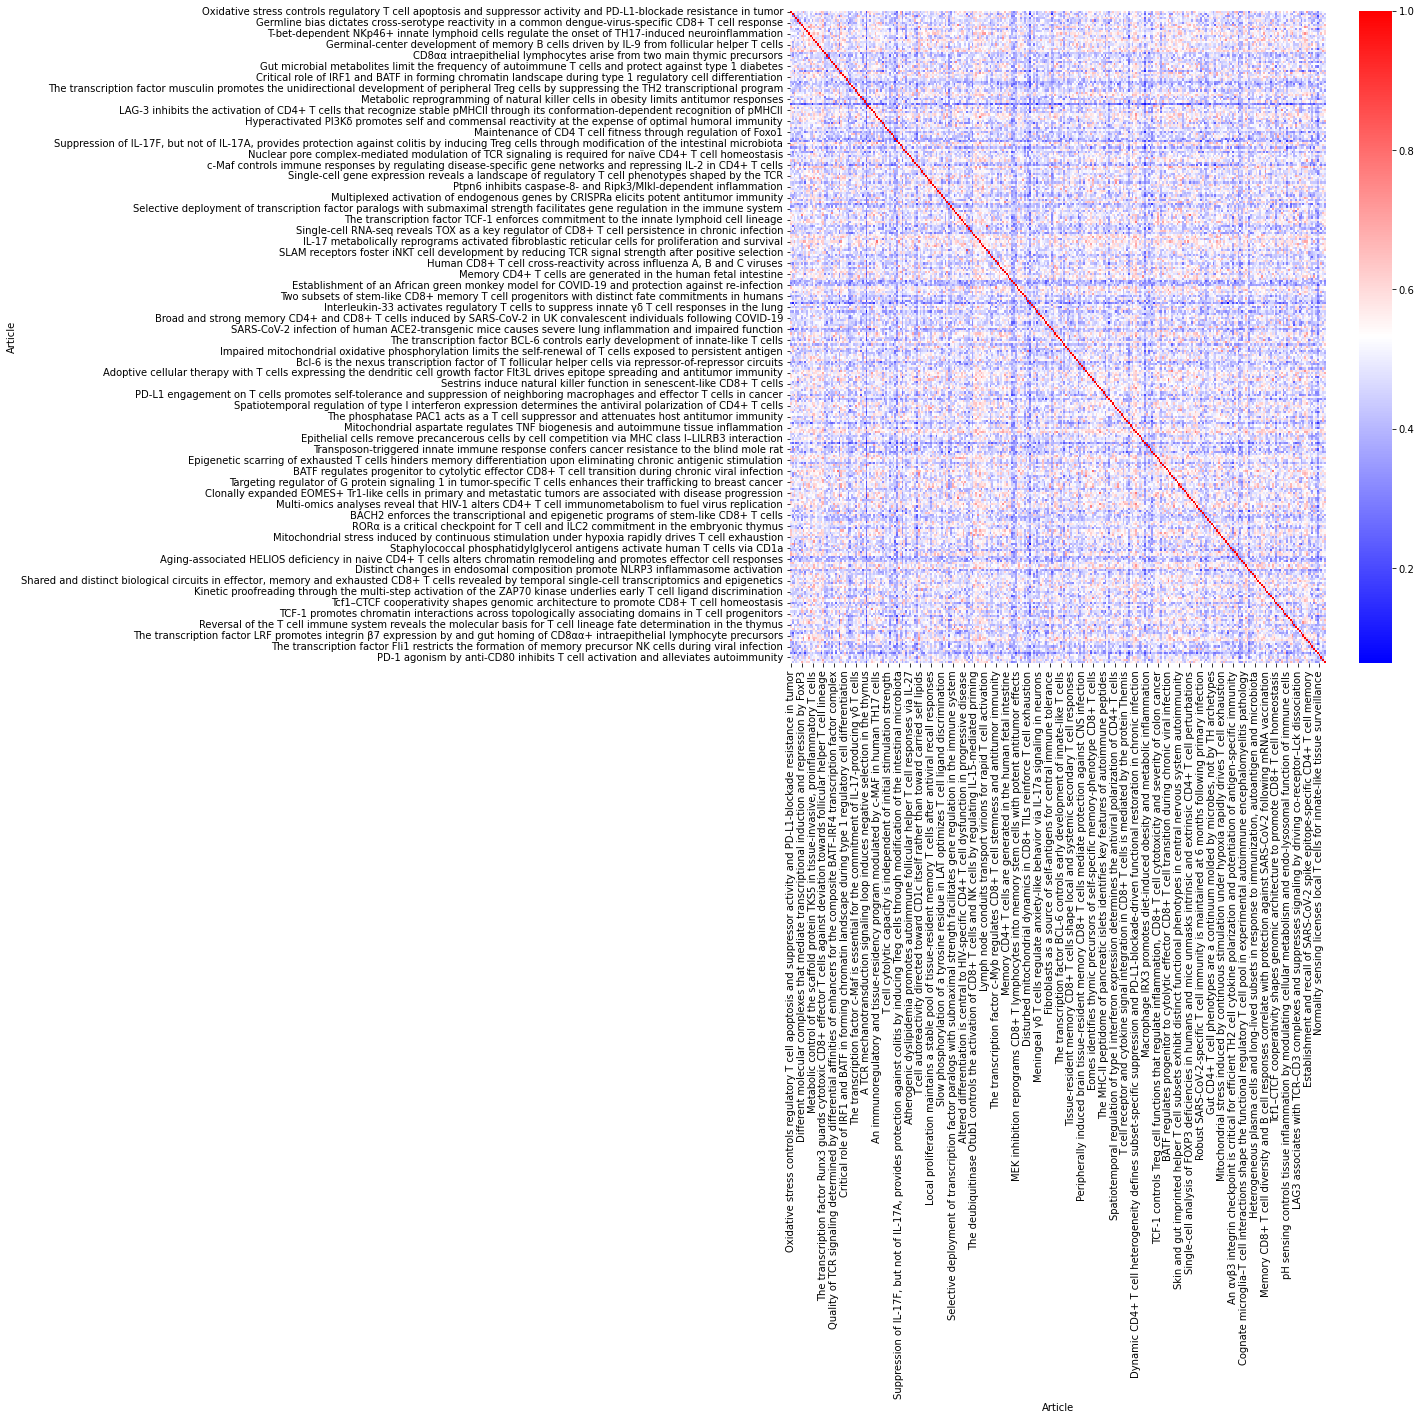

In [90]:
create_heatmap(sim_tcell,tcell_data.Article)
plt.savefig("../figures/TCELL_heatmap.png")

### B cell dataset

In [76]:
bcell_data=data[data["B CELL"]=="1"]

In [77]:
sim_bcell=compute_sim(list(bcell_data.Summary))

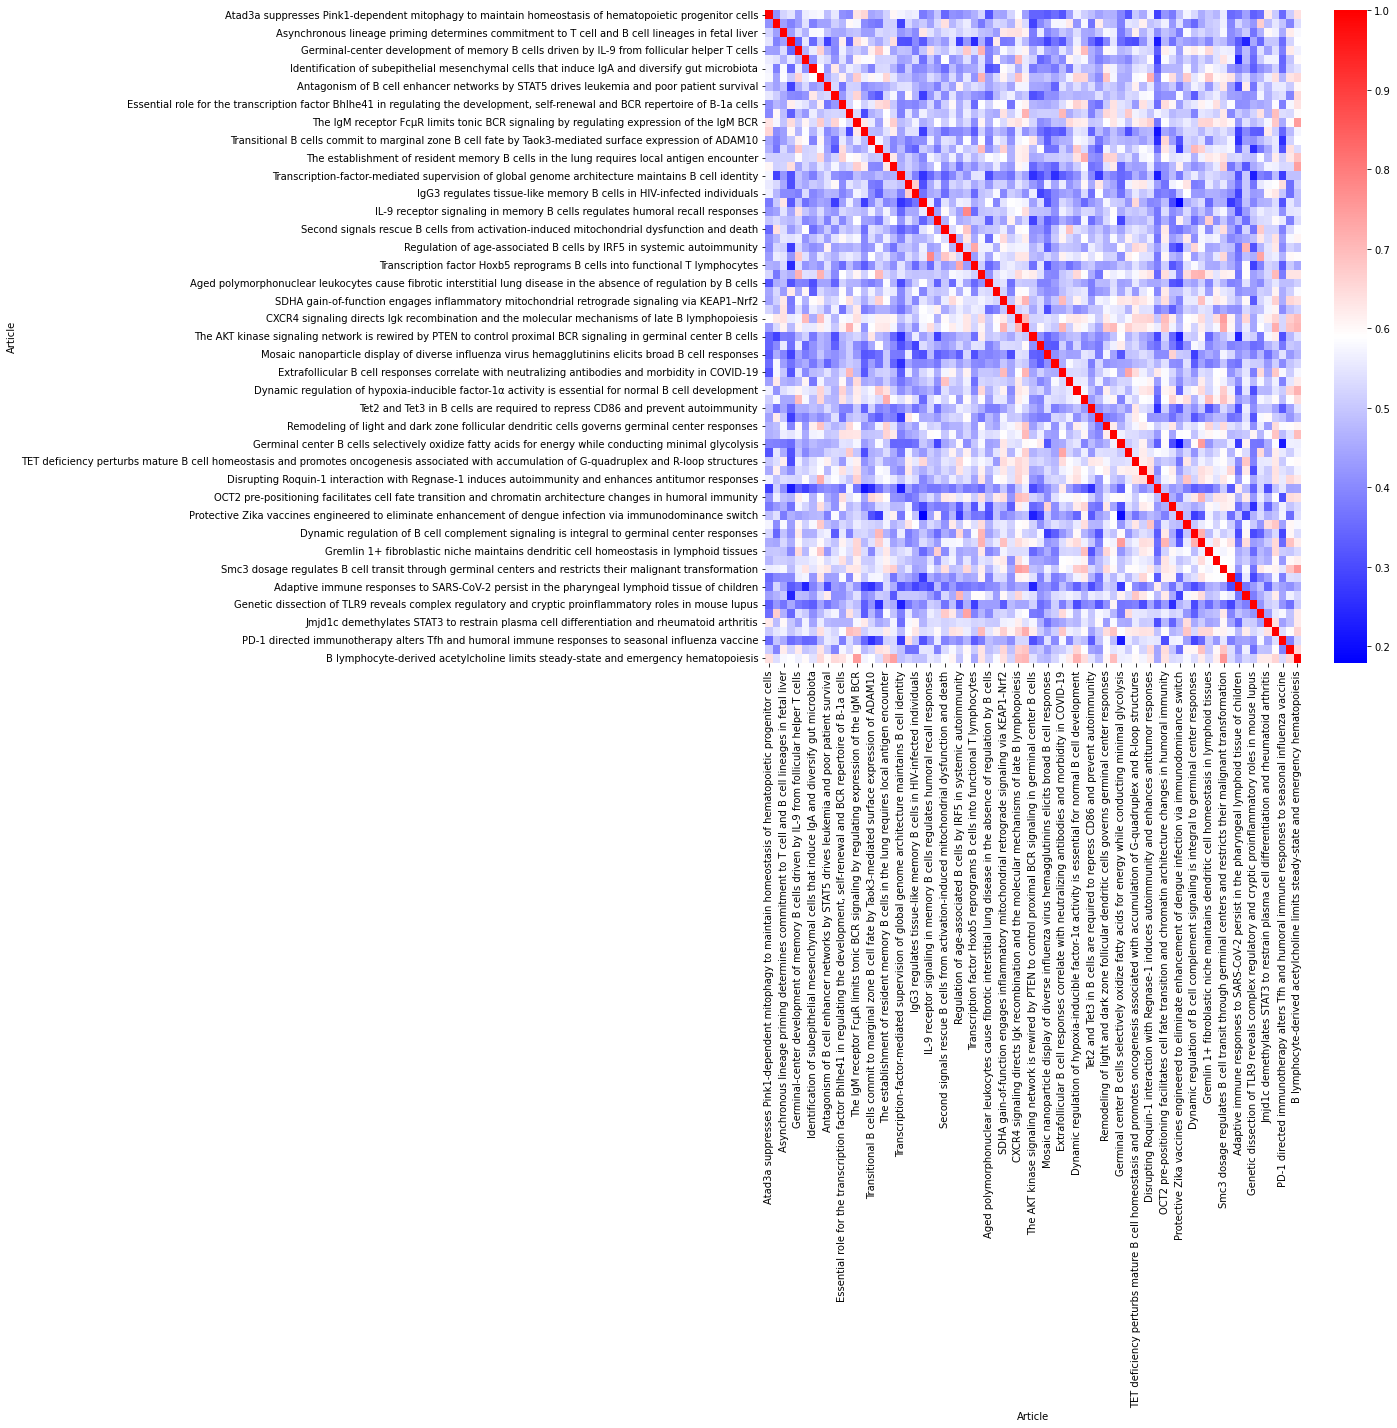

In [91]:
create_heatmap(sim_bcell,bcell_data.Article)
plt.savefig("../figures/BCELL_heatmap.png")

### TCR dataset

In [79]:
tcr_data=data[data["TCR"]=="1"]

In [80]:
sim_tcr=compute_sim(list(tcr_data.Summary))

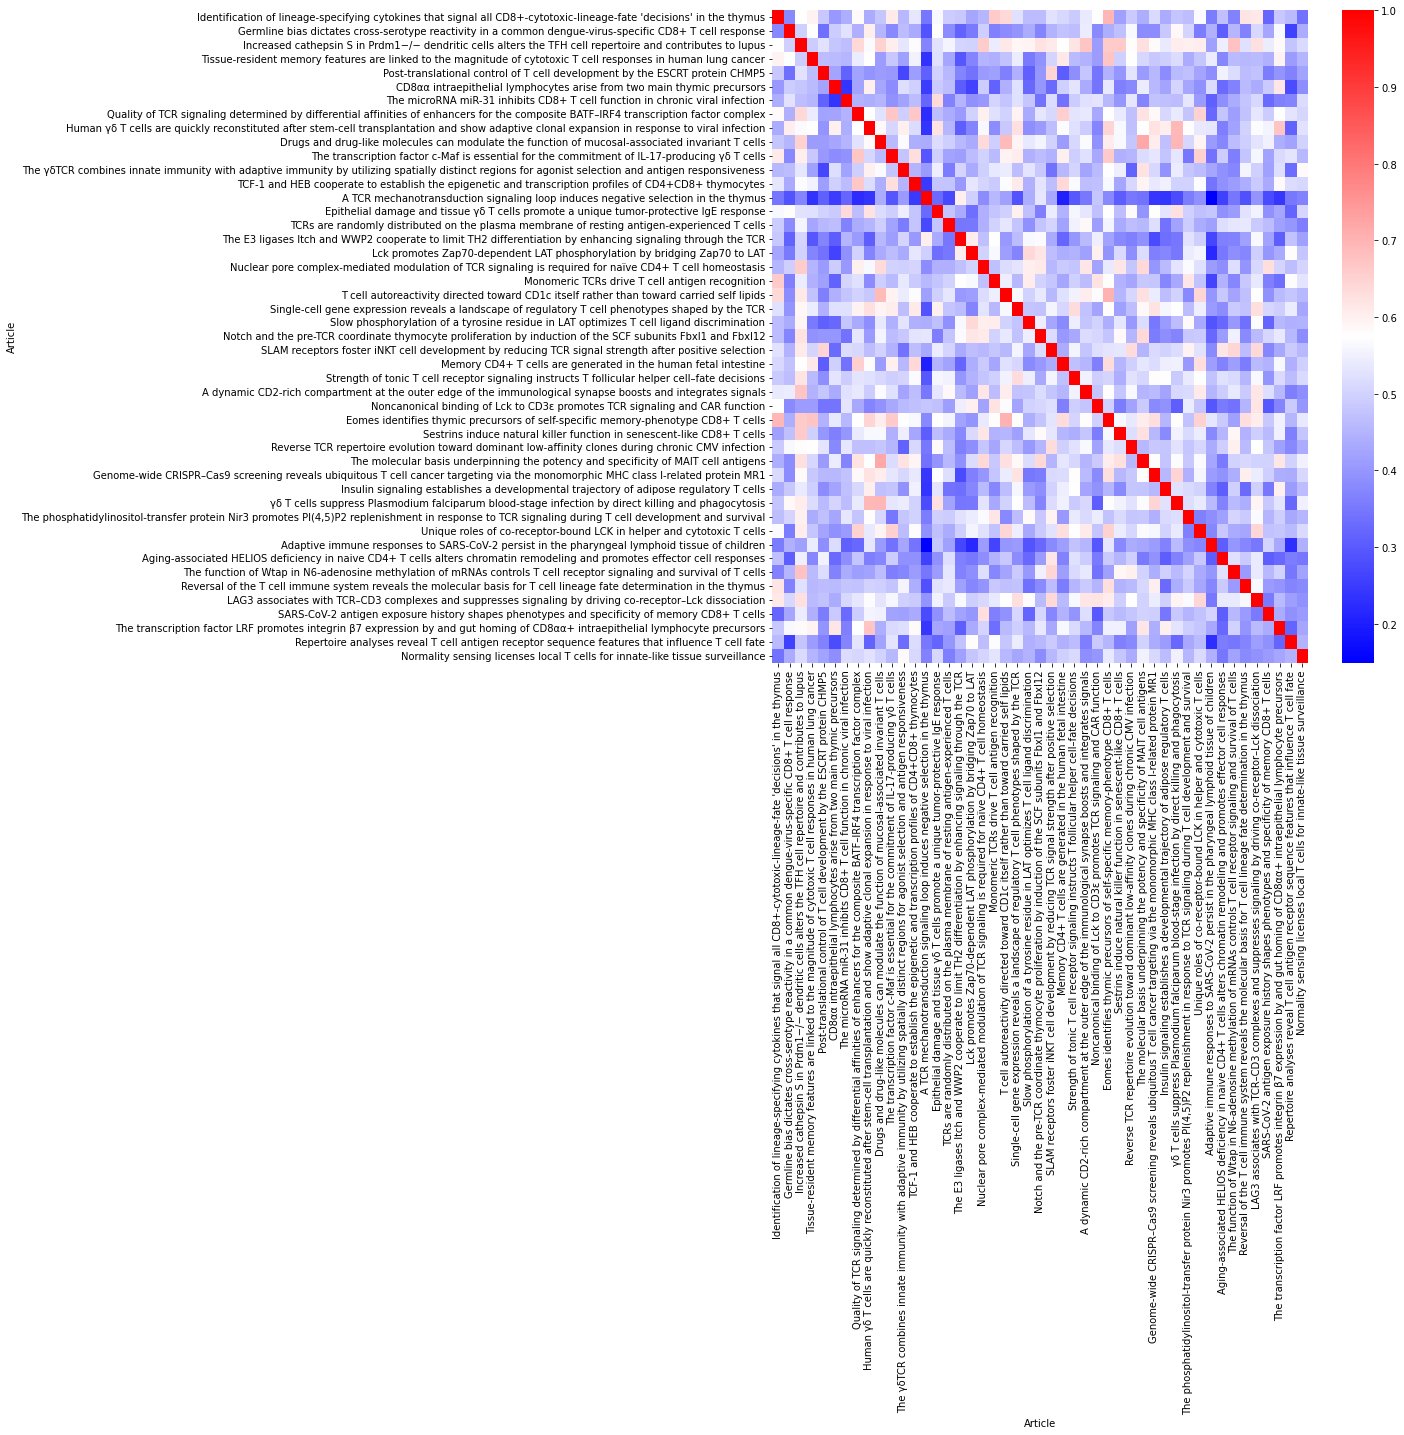

In [92]:
create_heatmap(sim_tcr,tcr_data.Article)
plt.savefig("../figures/TCR_heatmap.png")

### BCR dataset

In [82]:
bcr_data=data[data["BCR"]=="1"]

In [83]:
sim_bcr=compute_sim(list(bcr_data.Summary))

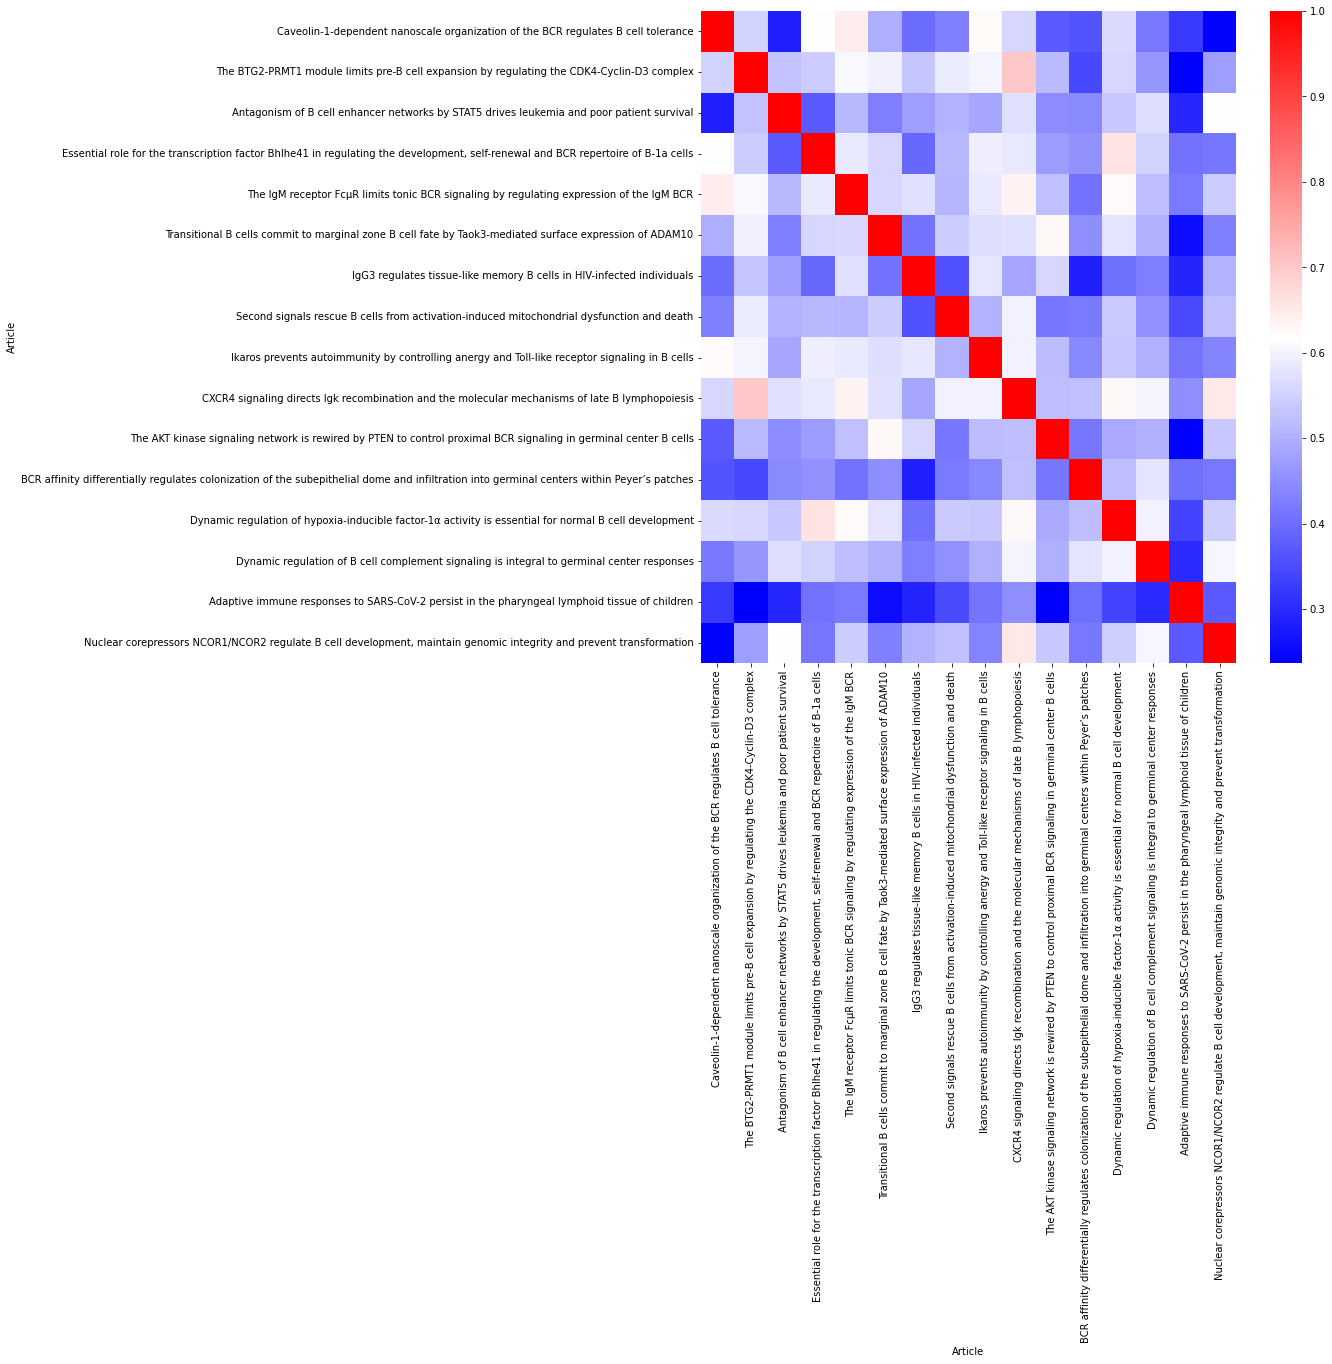

In [93]:
create_heatmap(sim_bcr,bcr_data.Article)
plt.savefig("../figures/BCR_heatmap.png")

### ML + DL dataset

In [88]:
ml_data=data[data["ML"]=="1"]
dl_data=data[data["DL"]=="1"]
mldl_data = pd.concat([ml_data,dl_data])
mldl_data = mldl_data.drop_duplicates()
mldl_data

Article  \
5    Single-cell analysis reveals the continuum of ...   
15   Germline bias dictates cross-serotype reactivi...   
28   MLL4 prepares the enhancer landscape for Foxp3...   
92   The γδTCR combines innate immunity with adapti...   
129  Translational repression of pre-formed cytokin...   
..                                                 ...   
529  Neutrophils direct preexisting matrix to initi...   
532  IL-1 and IL-1ra are key regulators of the infl...   
533  Loss of the intracellular enzyme QPCTL limits ...   
541  Normality sensing licenses local T cells for i...   
544  IFNγ and GM-CSF control complementary differen...   

                                               Summary  \
5    Vyas and colleagues show that a continuum of h...   
15   Cross-reactivity to dengue virus serotypes can...   
28   Zhao and colleagues show that the histone lysi...   
92   Hayday and colleagues show that the responsive...   
129  Wolkers and colleagues show that the RNA-bindi...   
..                                                 ...   
529  Rinkevich and colleagues show that preexisting...   
532  RNA vaccines have been associated with high re...   
533  Tumor-associated macrophages can restrict anti...   
541  Hayday and colleagues show that sustained Skin...   
544  Becher and colleagues use a mouse model of mul...   

                                               Authors       Date  \
5       Dimitris KaramitrosBilyana StoilovaParesh Vyas 2017-11-21   
15       Abigail CulshawKristin LadellGavin R Screaton 2017-09-25   
28                Katarzyna PlacekGangqing HuKeji Zhao 2017-07-31   
92         Daisy MelandriIva ZlatarevaAdrian C. Hayday 2018-11-12   
129       Fiamma SalernoSander EngelsMonika C. Wolkers 2018-07-09   
..                                                 ...        ...   
529   Adrian FischerJuliane WannemacherYuval Rinkevich        NaT   
532               Siri TahtinenAnn-Jay TongIra Mellman 2022-03-24   
533  Rosa Barreira da SilvaRicardo M. LeitaoMatthew... 2022-03-21   
541       Duncan R. McKenzieRosie HartAdrian C. Hayday        NaT   
544          Ana AmorimDonatella De FeoBurkhard Becher 2022-01-31   

           Access                                             Figure  \
5    Payed Access  https://media.springernature.com/w290h158/spri...   
15   Payed Access  https://media.springernature.com/w290h158/spri...   
28   Payed Access  https://media.springernature.com/w290h158/spri...   
92   Payed Access  https://media.springernature.com/w290h158/spri...   
129  Payed Access  https://media.springernature.com/w290h158/spri...   
..            ...                                                ...   
529  Payed Access  https://media.springernature.com/w290h158/spri...   
532  Payed Access  https://media.springernature.com/w290h158/spri...   
533  Payed Access  https://media.springernature.com/w290h158/spri...   
541  Payed Access  https://media.springernature.com/w290h158/spri...   
544  Payed Access  https://media.springernature.com/w290h158/spri...   

                                            Link paper TCR BCR T CELL  ...  \
5    https://www.nature.com/articles/s41590-017-0001-2   0   0      0  ...   
15             https://www.nature.com/articles/ni.3850   1   0      1  ...   
28             https://www.nature.com/articles/ni.3812   0   0      1  ...   
92   https://www.nature.com/articles/s41590-018-0253-5   1   0      1  ...   
129  https://www.nature.com/articles/s41590-018-0155-6   0   0      1  ...   
..                                                 ...  ..  ..    ...  ...   
529  https://www.nature.com/articles/s41590-022-011...   0   0      0  ...   
532  https://www.nature.com/articles/s41590-022-011...   0   0      0  ...   
533  https://www.nature.com/articles/s41590-022-011...   0   0      1  ...   
541  https://www.nature.com/articles/s41590-021-011...   1   0      1  ...   
544  https://www.nature.com/articles/s41590-021-011...   0   0      0  ...   

    NKC CD4 CD8 DEEP L

In [86]:
sim_l=compute_sim(list(mldl_data.Summary))

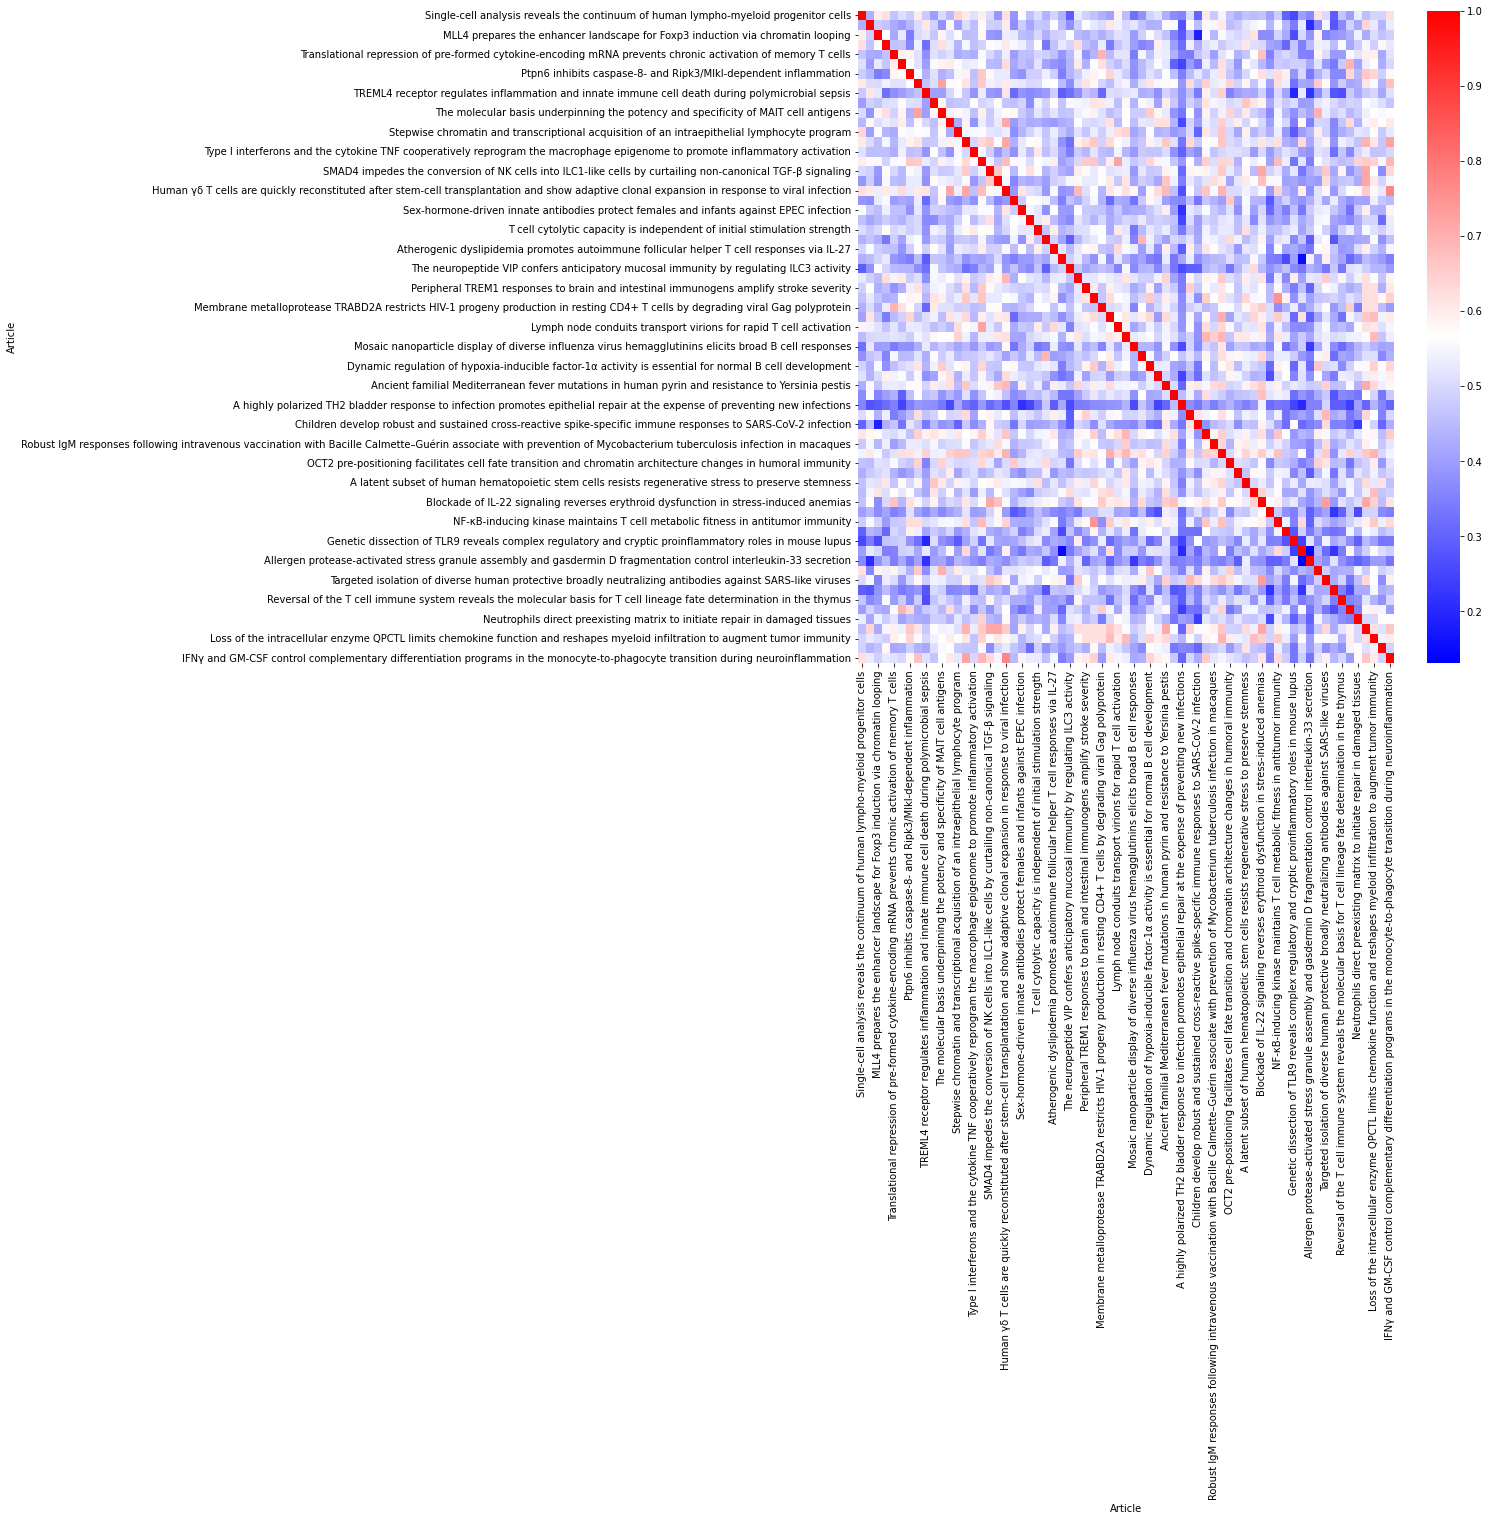

In [94]:
create_heatmap(sim_l,mldl_data.Article)
plt.savefig("../figures/ML_DL_heatmap.png")

## 6. Resolución del problema

En esta practica hemos creado una manera bastante visual y rapida para facilitar busqueda de articulos de interes en el ambito de inmunologia de la pagina web Nature Immunology. Al empezar las dos practicas teniamos en mente la idea de hacer la busqueda de los articulos mas automatica, eficiente y util. 

La primera practica de web scraping nos ha permitido sacar articulos, sus abstracts y mas informacion relevante como los keywords. Los keywords en nuestro caso se basan en T y B cells y aprendizaje automatico. En esta practica nos hemos limitado a 5 subsets de data para hacer el analysis, pero pueden haber tantos como las combinaciones de keywords hay, tambien las keywords pueden cambiar en funcion de los intereses del investigador. 

En esta practica nos hemos centrado a ver como podemos usar text data que proviene de los articulos para hacer una busqueda de los articulos mas similares entre ellos. Para ello hemos explicado y aplicado las tecnicas de sentence embedding y distance between vectors para poder  crear un heatmap de distancias entre los articulos. Esto nos da una herramienta visual que enseña como de simialres son los articulos. 

Por que es util? Vamos a poner un ejemplo. Supongamos que el investigador decide leer un articulo de los que hemos sacado con web scraping. Le parece interesante y quiere ver que otros articulos van sobre un tema parecido, para ello puede consultar el heatmap y ver el abstract de los papers con menor distancia a nivel de los embeddings. De esta manera no tendra que leer manualmente abstracts de decenas de articulos, sino de una subseleccion de 5 por ejemplo y estos ya seguramente seran de gran interes. Si el heatmap se vuele mas dificil de ver y comprender, usando las distancias cosenas, se pueden sacar top N articulos mas similares al articulo de interes si es necesario.


Para acabar queriamos poner un heatmap de todos los papers para ver como de diversos han sido los ultimos 5 años de Nature Immunology a nivel de contenido de los articulos.

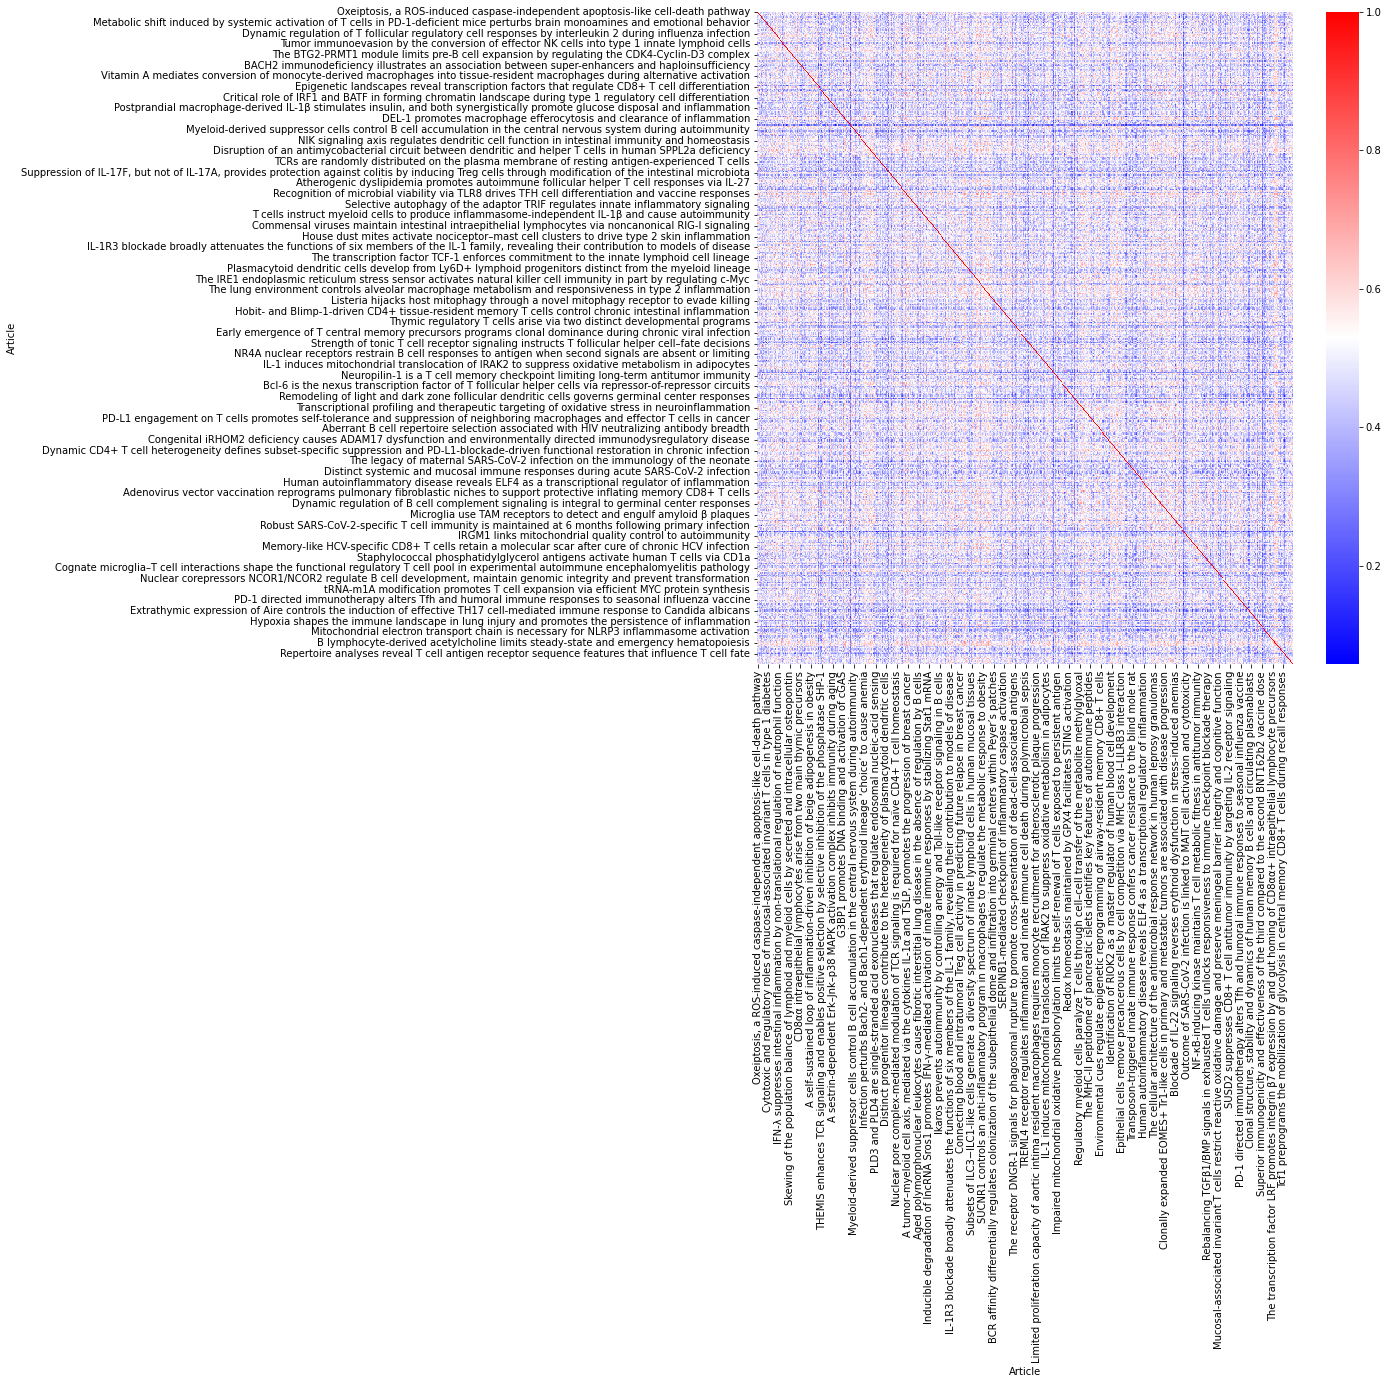

In [95]:
all_sim=compute_sim(list(data.Summary))
create_heatmap(all_sim,data.Article)
plt.savefig("../figures/ALL_heatmap.png")